In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np


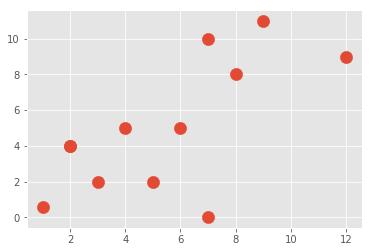

In [3]:
#initial data points in a 2D Space
X = np.array([[3, 2],
              [4, 5],
              [12, 9],
              [7, 0],
              [5, 2],
              [6,5],
              [2, 4],
              [8, 8],
              [7,10],
              [2,4],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = ["g","r","c","b","k", "g", "r", "c"]

In [6]:
#Implementation of k-Means algorithm
class K_Means:
    #initialization of k_Means:
    #k=2 : dividide dataset in two clusters
    #variance of centroids
    #max_iter: basically "how often we want to move the centroids"
    def __init__(self, k=3, variance=0.001, max_iter=100):
        self.k = k
        self.variance = variance
        self.max_iter = max_iter
        
    #EXCERCISE:
    #E1: implement the simple k-Means algorithm of the lecture
    #by setting initial centroids, classifying all given data points and recalculating the centroids
    
    def fit(self,data):
        self.steps = {} 
        for i in range(self.k):
            self.steps[i] = []
        
        #central point of clusters
        self.centroids = {} #Empty dictionary
        #choose how to set your first k centroids
        for i in range(self.k):
           #E1A: insert inital centroids
            self.centroids[i] = X[i]
            self.steps[i].append(list(X[i]))
        
        iterationIndex = 0
        for i in range(self.max_iter):
            iterationIndex += 1
            noChange = True
            #collectiong all classifications with self.classifications
            self.classifications = {}
            #setting number of clusters in set of classiifications         
            for i in range(self.k):
                self.classifications[i] = []
            #E1B: INSERT CORE ALGORITHM HERE
            for x in X:
                distances = []
                for key, j in self.centroids.items():
                    distance = np.linalg.norm(x-j)
                    distances.append(distance)
                self.classifications[distances.index(min(distances))].append(list(x))
            #E1C: INSERT RECALCULATION OF CENTROIDS WITH OPTIMIZATION CRITERIA

            for key, value in self.centroids.items():
                length = len(self.classifications[key])
                c = np.array(self.classifications[key])
                c = np.sum(c, axis=0)
                c = c/length
                if np.linalg.norm(c-value) > self.variance:
                    self.centroids[key] = c
                    self.steps[key].append(list(c))
                    noChange = False
            if noChange:
                print("Finished the K-Means algorithm after " + str(iterationIndex) + " iterations")
                return 
    def predict(self,data):
        #E1D: INSERT CLASSIFICATION ALGORITHM FOR PREDICTING UNKNOWN DATAPOINTS
        for datapoint in data:
                distances = []
                for key, j in self.centroids.items():
                    distance = np.linalg.norm(datapoint-j)
                    distances.append(distance)
                classification = distances.index(min(distances))
        return classification

Finished the K-Means algorithm after 2 iterations


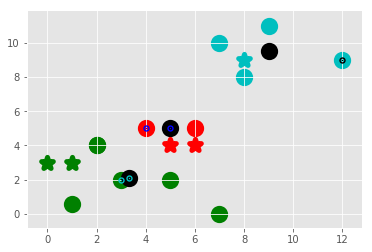

In [7]:
#MAIN PROGRAM
clf = K_Means()
clf.fit(X)


#Plotting Centroids and classified training set


    
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5, zorder=1)

# Coloring according to classifications
for classification in clf.classifications:
    color = colors[classification]
    color2 = colors[classification+2]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],  color=color, s=150, linewidths=5, zorder=-1)
    for centroidstep in clf.steps[classification]:
        plt.scatter(centroidstep[0], centroidstep[1], marker="o",  color=color2, s=2, linewidths=5, zorder=2)


#E1D: Try your Implementation with these data points. 
#These will be presented as stars and their predicted cluster color
# THIS WORKS ON THE TRAINED MODEL AND SIMULATES TEST DATA!
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()